# Data Science plots

In [2]:
# to import required library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Stacked Bar Plot

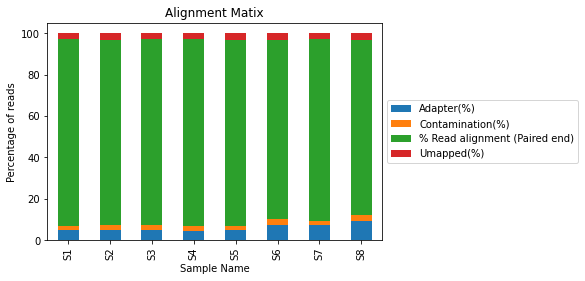

In [6]:
df1= pd.read_excel("stack_bar_plot.xlsx",sep='\t',index_col='Sample Name')
df1['Adapter(%)']= (df1['Total Read (Paired end)']-df1['Adapter removal (Paired End)'])*100/df1['Total Read (Paired end)']
df1['Contamination(%)']=(df1['Adapter removal (Paired End)']-df1['Contamination removal (Paired end)'])*100/df1['Total Read (Paired end)']
df1['% Read alignment (Paired end)'] =df1['Read alignment (Paired end)']*100/df1['Total Read (Paired end)']
df1['Umapped(%)']= 100 - (df1['Adapter(%)']+df1['Contamination(%)']+df1['% Read alignment (Paired end)'])
df1=df1[['Adapter(%)','Contamination(%)','% Read alignment (Paired end)','Umapped(%)']]
ax=df1.plot(kind='bar', stacked=True)
plt.ylabel('Percentage of reads')
plt.title('Alignment Matix')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("alignment_summary_stacked_bar.png", dpi=300, bbox_inches='tight')

# Clustermap

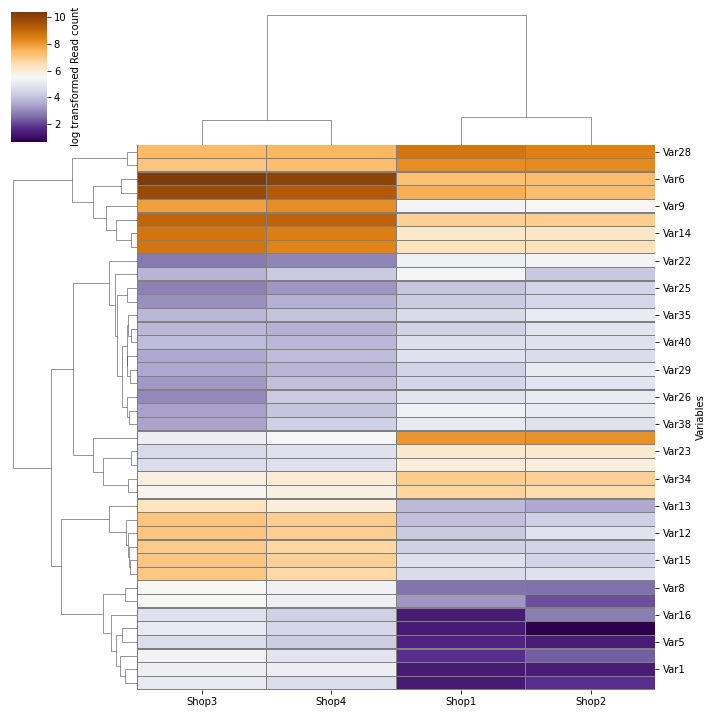

In [7]:
# read data into table
df=pd.read_excel('sample_data_for_clustermap.xls',index_col='Variables')
df.head()
# log transformation of the dataframe
all_log = np.log(df) 
# replacing -infinity and +infinity with NaN, then drop all those rows whose every entries are NaN
all1 = all_log.replace([np.inf, -np.inf], np.nan).dropna(how="all")
# fill all NaN with 0
all1.fillna("0",inplace=True)
# set all the column as float data type
all_h = all1[all1.columns].astype(float)
# the clustermap plot
sns.clustermap(all_h, method="average",cmap="PuOr_r",cbar_kws={'label': 'log transformed Read count'},linewidths=0.2, linecolor='gray')
# to save the plot
plt.savefig('clustermap.png', dpi=150, bbox_inches='tight')